In [1]:
import pandas as pd
import numpy as np

## Tutorial de pandas

### Object Creation

Creating dataframe by passing a numpy array

In [2]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [3]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.227655,0.288708,0.545767,-0.493738
2013-01-02,-0.140640,0.760860,-0.807145,-0.130870
2013-01-03,-1.013659,0.060175,0.387342,-0.740914
2013-01-04,-0.721114,-1.036798,-0.431572,0.580453
2013-01-05,0.547162,-0.232317,0.016861,1.232473
2013-01-06,-0.089012,-1.104701,-0.235619,1.827351


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [4]:
df2 = pd.DataFrame({'A': 1.,
                        'B': pd.Timestamp('20130102'),
                        'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                        'D': np.array([3] * 4, dtype='int32'),
                        'E': pd.Categorical(["test", "train", "test", "train"]),
                        'F': 'foo'})

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


### View Data

View top and bottom rows of the frame.

In [5]:
df2.head()

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [6]:
df.tail()

,A,B,C,D
2013-01-02,-0.140640,0.760860,-0.807145,-0.130870
2013-01-03,-1.013659,0.060175,0.387342,-0.740914
2013-01-04,-0.721114,-1.036798,-0.431572,0.580453
2013-01-05,0.547162,-0.232317,0.016861,1.232473
2013-01-06,-0.089012,-1.104701,-0.235619,1.827351


View index and columns

In [7]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [8]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

Statistics of your data

In [9]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.274153,-0.210679,-0.087394,0.379126
std,0.543225,0.741465,0.509040,1.014156
min,-1.013659,-1.104701,-0.807145,-0.740914
25%,-0.597749,-0.835678,-0.382583,-0.403021
50%,-0.184147,-0.086071,-0.109379,0.224792
75%,-0.101919,0.231575,0.294722,1.069468
max,0.547162,0.760860,0.545767,1.827351


Transpose your data

In [10]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.227655,-0.140640,-1.013659,-0.721114,0.547162,-0.089012
B,0.288708,0.760860,0.060175,-1.036798,-0.232317,-1.104701
C,0.545767,-0.807145,0.387342,-0.431572,0.016861,-0.235619
D,-0.493738,-0.130870,-0.740914,0.580453,1.232473,1.827351


Sorting by an axis

In [11]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.493738,0.545767,0.288708,-0.227655
2013-01-02,-0.130870,-0.807145,0.760860,-0.140640
2013-01-03,-0.740914,0.387342,0.060175,-1.013659
2013-01-04,0.580453,-0.431572,-1.036798,-0.721114
2013-01-05,1.232473,0.016861,-0.232317,0.547162
2013-01-06,1.827351,-0.235619,-1.104701,-0.089012


Sorting by values

In [12]:
df.sort_values(by='C')

,A,B,C,D
2013-01-02,-0.140640,0.760860,-0.807145,-0.130870
2013-01-04,-0.721114,-1.036798,-0.431572,0.580453
2013-01-06,-0.089012,-1.104701,-0.235619,1.827351
2013-01-05,0.547162,-0.232317,0.016861,1.232473
2013-01-03,-1.013659,0.060175,0.387342,-0.740914
2013-01-01,-0.227655,0.288708,0.545767,-0.493738


### Selection

In [13]:
df['A']

2013-01-01   -0.227655
2013-01-02   -0.140640
2013-01-03   -1.013659
2013-01-04   -0.721114
2013-01-05    0.547162
2013-01-06   -0.089012
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

In [14]:
df[0:3]

,A,B,C,D
2013-01-01,-0.227655,0.288708,0.545767,-0.493738
2013-01-02,-0.140640,0.760860,-0.807145,-0.130870
2013-01-03,-1.013659,0.060175,0.387342,-0.740914


In [15]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.140640,0.760860,-0.807145,-0.130870
2013-01-03,-1.013659,0.060175,0.387342,-0.740914
2013-01-04,-0.721114,-1.036798,-0.431572,0.580453


### Selection by label

Selecting on a multi-axis by label:

In [16]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,-0.227655,0.288708
2013-01-02,-0.140640,0.760860
2013-01-03,-1.013659,0.060175
2013-01-04,-0.721114,-1.036798
2013-01-05,0.547162,-0.232317
2013-01-06,-0.089012,-1.104701


In [17]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,-0.140640,0.760860
2013-01-03,-1.013659,0.060175
2013-01-04,-0.721114,-1.036798


For getting a scalar value:

In [18]:
df.loc[dates[0], 'A']

-0.22765478526274754

Selection by position

In [19]:
df.iloc[3]

A   -0.721114
B   -1.036798
C   -0.431572
D    0.580453
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python:

In [20]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.721114,-1.036798
2013-01-05,0.547162,-0.232317


In [21]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-0.140640,-0.807145
2013-01-03,-1.013659,0.387342
2013-01-05,0.547162,0.016861


For slicing rows explicitly:

In [22]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.140640,0.760860,-0.807145,-0.130870
2013-01-03,-1.013659,0.060175,0.387342,-0.740914


For slicing columns explicitly:

In [23]:
 df.iloc[:, 1:3]

,B,C
2013-01-01,0.288708,0.545767
2013-01-02,0.760860,-0.807145
2013-01-03,0.060175,0.387342
2013-01-04,-1.036798,-0.431572
2013-01-05,-0.232317,0.016861
2013-01-06,-1.104701,-0.235619


### Boolean indexing

Using a single column’s values to select data.

In [24]:
df[df.A > 0]

,A,B,C,D
2013-01-05,0.547162,-0.232317,0.016861,1.232473


Using the isin() method for filtering:

In [25]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,-0.227655,0.288708,0.545767,-0.493738,one
2013-01-02,-0.140640,0.760860,-0.807145,-0.130870,one
2013-01-03,-1.013659,0.060175,0.387342,-0.740914,two
2013-01-04,-0.721114,-1.036798,-0.431572,0.580453,three
2013-01-05,0.547162,-0.232317,0.016861,1.232473,four
2013-01-06,-0.089012,-1.104701,-0.235619,1.827351,three


In [26]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,-1.013659,0.060175,0.387342,-0.740914,two
2013-01-05,0.547162,-0.232317,0.016861,1.232473,four


### Setting

Setting values by label:

In [27]:
df.at[dates[0], 'A'] = 0

Setting values by position:

In [28]:
df.iat[0, 1] = 0

Setting by assigning with a NumPy array:

In [29]:
df.loc[:, 'D'] = np.array([5] * len(df))
df

,A,B,C,D
2013-01-01,0.000000,0.000000,0.545767,5
2013-01-02,-0.140640,0.760860,-0.807145,5
2013-01-03,-1.013659,0.060175,0.387342,5
2013-01-04,-0.721114,-1.036798,-0.431572,5
2013-01-05,0.547162,-0.232317,0.016861,5
2013-01-06,-0.089012,-1.104701,-0.235619,5


A where operation with setting.

In [30]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D
2013-01-01,0.000000,0.000000,-0.545767,-5
2013-01-02,-0.140640,-0.760860,-0.807145,-5
2013-01-03,-1.013659,-0.060175,-0.387342,-5
2013-01-04,-0.721114,-1.036798,-0.431572,-5
2013-01-05,-0.547162,-0.232317,-0.016861,-5
2013-01-06,-0.089012,-1.104701,-0.235619,-5


### Missing Data

To drop any rows that have missing data.

In [32]:
df2.dropna(how='any')

,A,B,C,D
2013-01-01,0.000000,0.000000,-0.545767,-5
2013-01-02,-0.140640,-0.760860,-0.807145,-5
2013-01-03,-1.013659,-0.060175,-0.387342,-5
2013-01-04,-0.721114,-1.036798,-0.431572,-5
2013-01-05,-0.547162,-0.232317,-0.016861,-5
2013-01-06,-0.089012,-1.104701,-0.235619,-5


Filling missing data.

In [33]:
df2.fillna(value=5)

,A,B,C,D
2013-01-01,0.000000,0.000000,-0.545767,-5
2013-01-02,-0.140640,-0.760860,-0.807145,-5
2013-01-03,-1.013659,-0.060175,-0.387342,-5
2013-01-04,-0.721114,-1.036798,-0.431572,-5
2013-01-05,-0.547162,-0.232317,-0.016861,-5
2013-01-06,-0.089012,-1.104701,-0.235619,-5


### Statistics

Performing a descriptive statistic:

In [34]:
df2.mean()

A   -0.418598
B   -0.532475
C   -0.404051
D   -5.000000
dtype: float64

In [36]:
df2.mean(1)

2013-01-01   -1.386442
2013-01-02   -1.677161
2013-01-03   -1.615294
2013-01-04   -1.797371
2013-01-05   -1.449085
2013-01-06   -1.607333
Freq: D, dtype: float64

### Apply

Applying functions to the data:

In [37]:
df.apply(lambda x: x.max() - x.min())

A    1.560821
B    1.865561
C    1.352912
D    0.000000
dtype: float64

### Join 

SQL style merges.

In [40]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [41]:
right

,key,rval
0,foo,4
1,foo,5


In [42]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Grouping

In [43]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                             'foo', 'bar', 'foo', 'foo'],
                       'B': ['one', 'one', 'two', 'three',
                             'two', 'two', 'one', 'three'],
                       'C': np.random.randn(8),
                       'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.746805,1.281068
1,bar,one,-0.522324,-0.661609
2,foo,two,0.360196,0.957108
3,bar,three,1.140932,-0.114997
4,foo,two,0.601769,2.059429
5,bar,two,-0.579887,-0.533269
6,foo,one,-0.256279,-0.683237
7,foo,three,0.499654,1.552855


In [44]:
df.groupby('A').sum()

,C,D
A,,
bar,0.038721,-1.309875
foo,0.458535,5.167224


In [45]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -0.522324 -0.661609
    three  1.140932 -0.114997
    two   -0.579887 -0.533269
foo one   -1.003084  0.597831
    three  0.499654  1.552855
    two    0.961965  3.016537

### Plotting

On a DataFrame, the plot() method is a convenience to plot all of the columns with labels:

<Figure size 432x288 with 0 Axes>

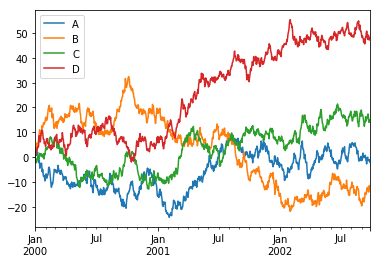

In [51]:
import matplotlib.pyplot as plt
ts = pd.Series(np.random.randn(1000),
                index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()

df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                      columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc='best')